In [517]:
from __future__ import absolute_import
from __future__ import print_function

import sys, os
import tensorflow as tf
from keras import backend as K
K.set_image_data_format('channels_last')

# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

import scipy.misc
import scipy.io  
import matplotlib.pyplot as plt
import urllib
import requests
from PIL import Image
from io import BytesIO

# Lab report - Mateusz Górczany

In [154]:
mat = scipy.io.loadmat('data/Hiragana_64x64_Data_gray.mat') 

HiraganaData = mat['HiraganaData']
labels       = mat['labels']

numData = HiraganaData.shape[0]
HiraganaData = HiraganaData.reshape(numData, 64, 64, 1)


In [5]:
X_train = HiraganaData[:5000, :, :, :]
X_test  = HiraganaData[5000:, :, :, :]
y_train = labels[:5000]
y_test  = labels[5000:]

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
Y_train = np_utils.to_categorical(y_train, 41)
Y_test  = np_utils.to_categorical(y_test, 41)

In [8]:
model = Sequential()
model.add(Convolution2D(16, (5, 5), activation='relu', input_shape=(64,64, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, (3, 3), activation='relu',))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0

In [10]:
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [17]:
epochs=10 

# 9. Fit model on training data
history = model.fit( X_train, Y_train,
        validation_data=(X_test, Y_test),		# Y_test - categorical 
        batch_size=32, epochs=epochs, verbose=1)
 

Epoch 1/10
157/157 [==============================] - 36s 227ms/step - loss: 0.1547 - accuracy: 0.9460 - val_loss: 0.2362 - val_accuracy: 0.9640
Epoch 2/10
157/157 [==============================] - 33s 212ms/step - loss: 0.1532 - accuracy: 0.9490 - val_loss: 0.2208 - val_accuracy: 0.9652
Epoch 3/10
157/157 [==============================] - 31s 199ms/step - loss: 0.1270 - accuracy: 0.9588 - val_loss: 0.2644 - val_accuracy: 0.9629
Epoch 4/10
157/157 [==============================] - 32s 207ms/step - loss: 0.1339 - accuracy: 0.9524 - val_loss: 0.2421 - val_accuracy: 0.9551
Epoch 5/10
157/157 [==============================] - 34s 215ms/step - loss: 0.1321 - accuracy: 0.9564 - val_loss: 0.2351 - val_accuracy: 0.9629
Epoch 6/10
157/157 [==============================] - 33s 208ms/step - loss: 0.1270 - accuracy: 0.9606 - val_loss: 0.2819 - val_accuracy: 0.9573
Epoch 7/10
157/157 [==============================] - 33s 211ms/step - loss: 0.1034 - accuracy: 0.9670 - val_loss: 0.2729 - val_ac

In [520]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('\nepochs ={:3d} '.format(epochs))
print('score = {:.2f}%\n'.format(score[1]*100))



epochs = 10 
score = 95.73%



## Model accuracy: 95.73%, after 10 epochs

In [26]:
model.save("model.h5")

### Visualization

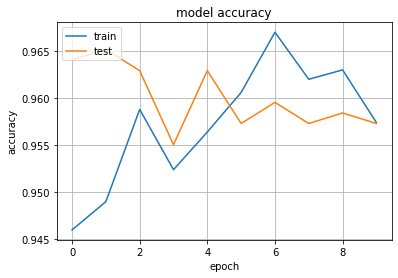

In [374]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()


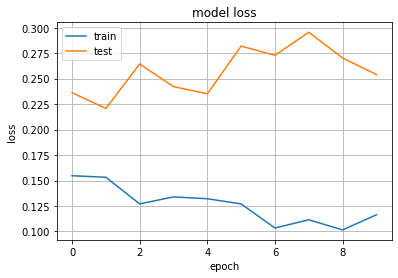

In [488]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### This function loads image from link and converts it to binary image

In [500]:
# loads image from url and returns 
def load_image(link, invert=False):
        response = requests.get(link)
        image_byte = BytesIO(response.content)
        img = Image.open(image_byte)
        img = img.convert("L")
        img = img.resize((64,64), Image.NEAREST)
        img = img_to_array(img)
        if invert:
            img = 255-img
        img = img.astype("float32")
        img = img/255.0
        return (img > 0.5)*1.0
        

In [501]:
image3 = load_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3Oe1NX1NlqJf1hqs15l_iYluGbjBDPwZ-uw&usqp=CAU", invert=True)

# Hiragana mark has been loaded to test the model with external data.

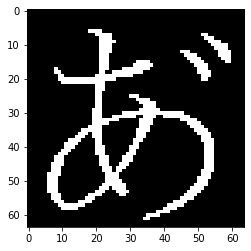

In [502]:
plt.imshow(image3, cmap=plt.cm.gray)

In [2]:
def draw_images(x_data, y_data):
    random_indexes = np.random.choice(y_data.reshape(y_data.shape[0]), 10)
    return (x_data[random_indexes].reshape(random_indexes.shape[0], 64, 64), y_data[random_indexes].reshape(random_indexes.shape[0]) )
    

In [3]:
drawn = draw_images(X_test, y_test)

NameError: name 'X_test' is not defined

In [515]:
def plot_images(drawed):
    fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(24,24))
    for index in range(10):
        image = drawed[0][index]
        pred = model.predict_classes(image.reshape(1,64,64,1))
        ax[index, 0].imshow(image)
        ax[index, 0].set_title(f"Predicted: {pred[0]}")
        
        actual = drawed[1][index]
        ax[index, 1].set_title(f"Correct: {actual}")
        ax[index, 1].imshow(drawed[0][index].reshape(64,64))   
        fig.tight_layout()
    
    fig.tight_layout()
    plt.show()

# Few random images and results, as it's visible, this model is pretty accurate, but dataset is definitely not Hiragana, so Hiragana mark won't be checked

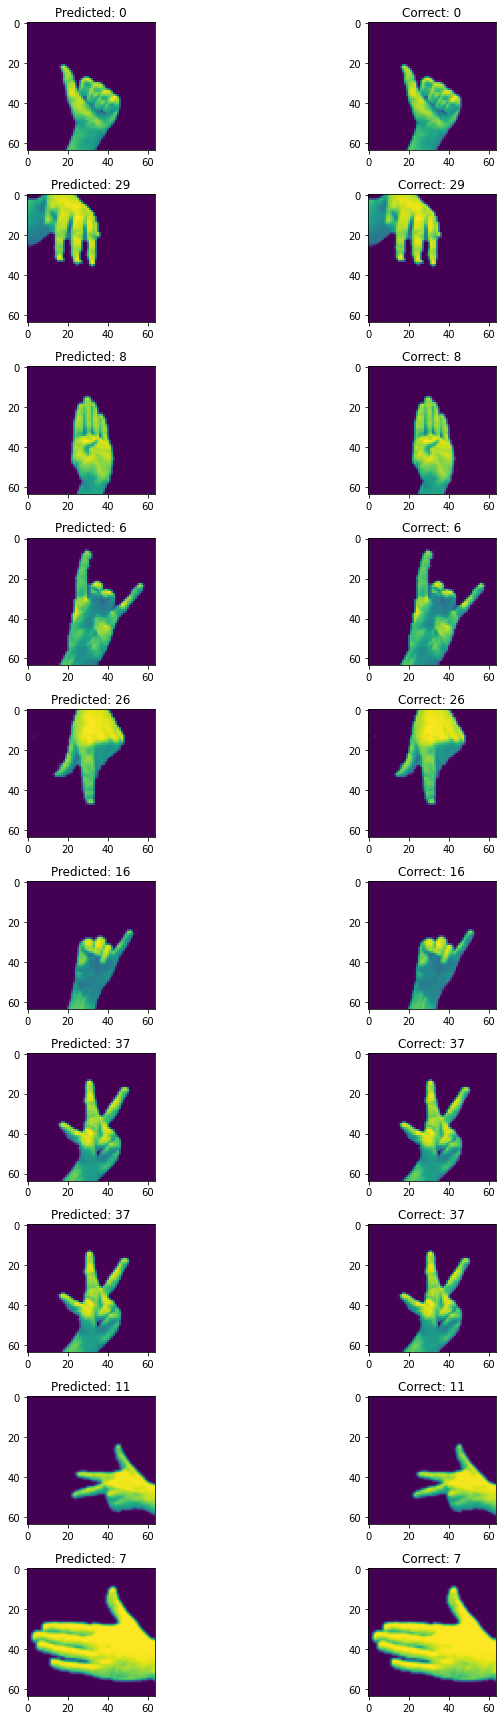

In [516]:
plot_images(drawed)